## Scaling Exercises

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from math import sqrt
# to turn off pink warning boxes basically for display purposes in class
# import warnings
# warnings.filterwarnings('ignore')

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# import tools for scaling
import sklearn.preprocessing

# classification algorithms
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# linear regression algorithms
from sklearn.linear_model import LinearRegression

# classification analysis
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# to see local file system
import os

# import our own modules
import env
import acquire

np.random.seed = 9751

# jupyter settings
%matplotlib inline

In [2]:
from wrangle import wrangle_zillow

In [3]:
train, val, test = wrangle_zillow()

In [4]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
1691775,3,1.0,944.0,239885.0,1951,4407.69,6037.0
1336667,4,2.0,1254.0,390000.0,1960,4869.32,6037.0
1041047,3,3.0,3429.0,631904.0,1958,7833.45,6037.0
1530579,3,2.0,1187.0,447299.0,1941,5271.25,6037.0
174339,3,2.0,1326.0,873115.0,1938,10591.38,6037.0


##### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .


In [5]:
train.dtypes

bedrooms        int64
bathrooms     float64
area          float64
tax_value     float64
year_built      int64
tax_amount    float64
fips           object
dtype: object

It seems that columns that could use scaling are area, tax_value,
and tax_amount. May be useful to scale years to years from zero.


In [6]:
scaler_min_max = sklearn.preprocessing.MinMaxScaler()

In [16]:
x1_train = train[['area']]

In [17]:
scaler_min_max.fit(x1_train)

MinMaxScaler()

In [18]:
x1_train_scaled = scaler_min_max.transform(x1_train)

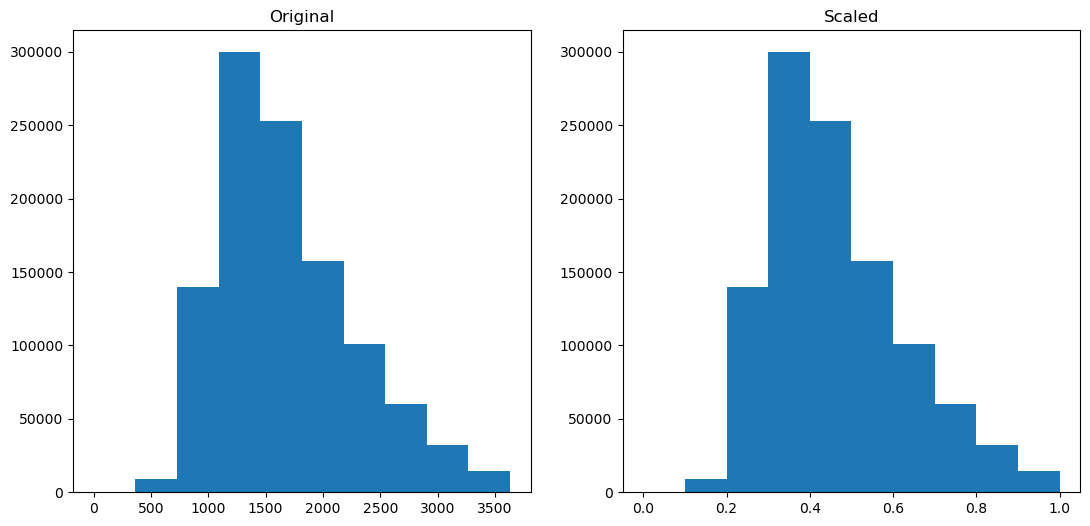

In [19]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x1_train)
plt.title('Original')
plt.subplot(122)
plt.hist(x1_train_scaled)
plt.title('Scaled')
plt.show()

##### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?


##### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.


##### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?


##### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!
